## Práctica 2: Intervalo de confianza para el coeficiente de determinación

1. Genera una muestra de números aleatorios de tamaño N=100 distribuidos normalmente (gaussiana) y asigna estos valores a la variable $ 'x' $.
2. Define $ 'y' $ como una función lineal de $ 'x' $, por ejemplo, $ y = 2x + error $, donde el $ 'error' $ es un término de error aleatorio distribuido normalmente (gaussiana).
3. Utiliza la función $ 'lm' $ para ajustar un modelo de regresión lineal a los datos. Imprime un resumen del modelo y analiza los coeficientes.
4. Define una función con algunos parámetros generales que permite calcular el coeficiente de determinación $ R^{2} $ para un remuestreo de los datos.
5. Estudia cómo se comporta el coeficiente de determinación. Determina mediante la función anterior y la técnica de remuestreo bootstrap los intervalos de confianza del coeficiente de determinación $ R^{2} $.
6. Calcula tambien mediante bootstrap los intervalos de confianza para los coeficientes del modelo.

1. Genera una muestra de tamaño N=100 números aleatorios distribuidos normalmente y asigna estos valores a la variable $ 'x' $.
2. Define $ 'y' $ como una función lineal de $ 'x' $, por ejemplo, $ y = 2x + error $, donde el $ 'error' $ es un término de error aleatorio distribuido normalmente.

In [24]:
# Genera una muestra de números aleatorios de tamaño N=100 y Define 'y' como una función lineal de 'x'
N = 100 
media = 8
desv = 2
x = rnorm(N, media, desv)

error = rnorm(N, 4, 1)

y = 2*x + error

#Dataframe de x y y
datos = data.frame(x, y)

Mediana muestral: 7.885203

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  2.605   6.930   7.885   8.080   9.406  14.173 

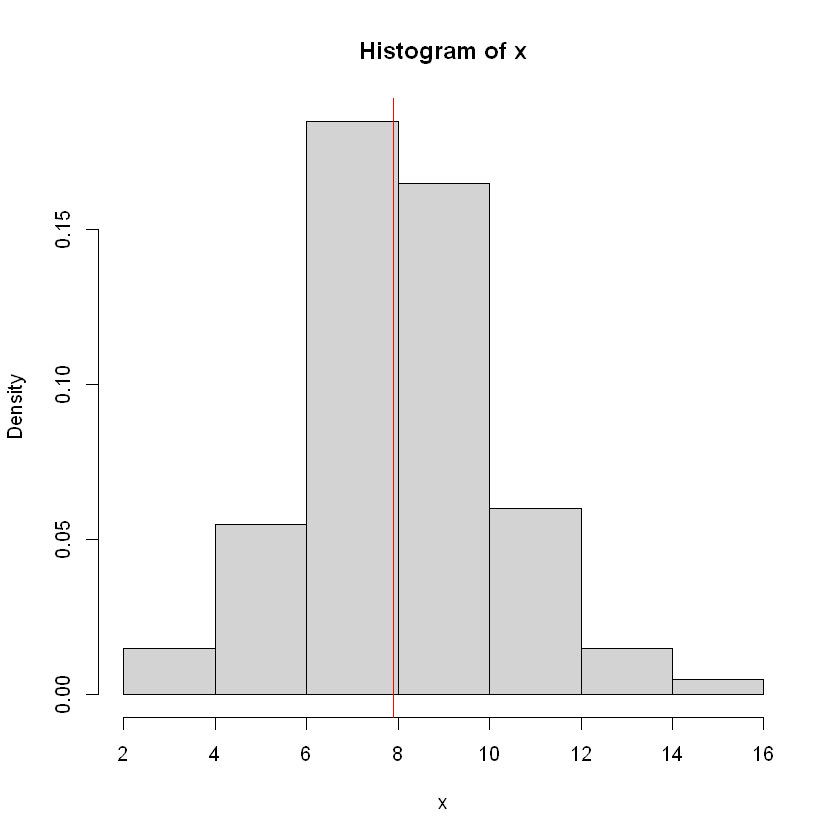

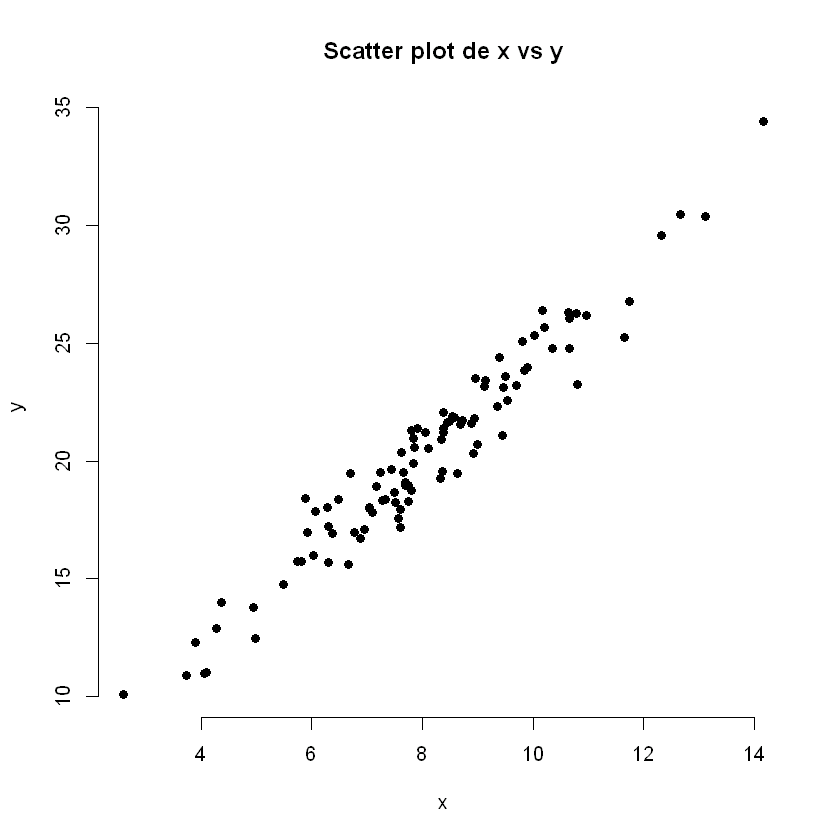

In [25]:
# Análisis exploratorio y Scatter plot
hist(x, freq = FALSE)
abline(v=median(x), lty=1, col="red")
cat("Mediana muestral:", median(x))

summary(x)

#scatter plot
plot(x, y, main="Scatter plot de x vs y", xlab="x", ylab="y", pch=19, frame=FALSE)

3. Utiliza la función $ 'lm' $ para ajustar un modelo de regresión lineal a los datos. Imprime un resumen del modelo y analiza los coeficientes.


Call:
lm(formula = y ~ x, data = datos)

Residuals:
     Min       1Q   Median       3Q      Max 
-2.62008 -0.66155  0.04268  0.73834  2.54411 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept)  3.83009    0.42492   9.014 1.67e-14 ***
x            2.04058    0.05092  40.077  < 2e-16 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 1.062 on 98 degrees of freedom
Multiple R-squared:  0.9425,	Adjusted R-squared:  0.9419 
F-statistic:  1606 on 1 and 98 DF,  p-value: < 2.2e-16


Coeficientes del modelo de regresión lineal: 
Intercepto: 3.830093 
Pendiente: 2.040577 
Coeficiente de determinación: 0.9424925 
se observa una pendiente positiva en la relación entre x e y, 
lo que indica una relación lineal positiva entre las dos variables. 
La pendiente es de aproximadamente 2, lo que sugiere que por cada
unidad de aumento en x, la variable y aumenta en aproximadamente 2 unidades. 
El coeficiente de intercepción es de aproximadamente 4, lo que indica
que el valor de y cuando x es 0 es de aproximadamente 4. 
En cuanto al coeficiente de determinación, es alto, lo que sugiere que el modelo
ajustado explica una gran proporción de la variabilidad en la variable 
dependiente. Esto indica un buen ajuste del modelo. 

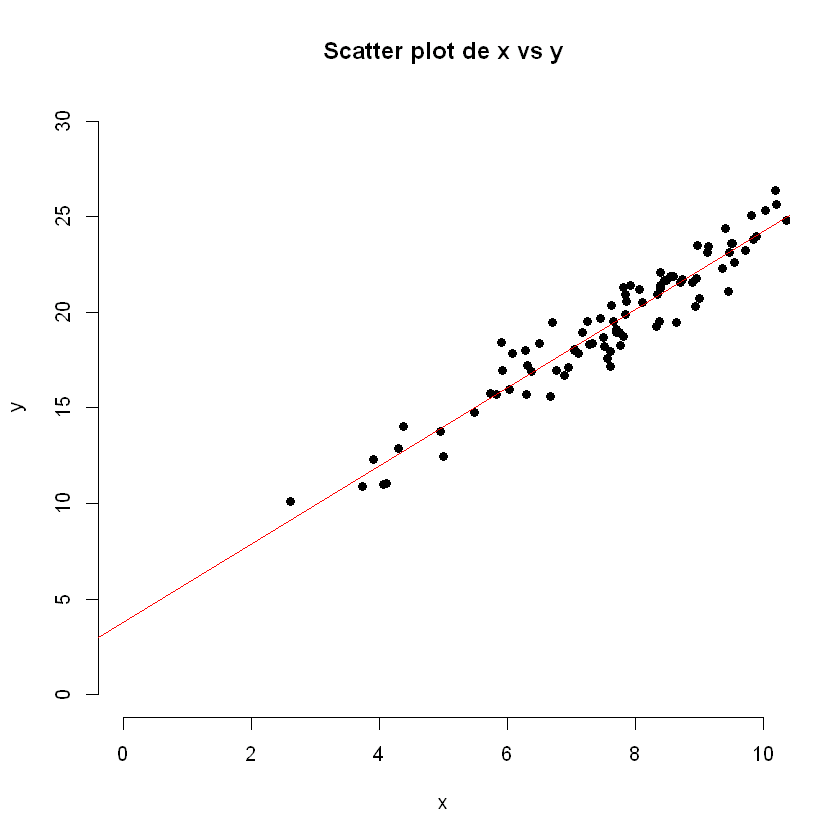

In [33]:
mrl = lm(y ~ x, datos)

summary(mrl)

# Gráfico de dispersión con la línea de regresión ajustada
plot(x, y, main="Scatter plot de x vs y", xlab="x", ylab="y", pch=19, frame=FALSE, xlim = c(0, 10), ylim = c(0,30))
abline(mrl, col="red")
 
#coeficientes
cat("Coeficientes del modelo de regresión lineal:", "\n")
cat("Intercepto:", coef(mrl)[1], "\n")
cat("Pendiente:", coef(mrl)[2], "\n")
cat("Coeficiente de determinación:", summary(mrl)$r.squared, "\n")

cat("se observa una pendiente positiva en la relación entre x e y, 
lo que indica una relación lineal positiva entre las dos variables. 
La pendiente es de aproximadamente 2, lo que sugiere que por cada
unidad de aumento en x, la variable y aumenta en aproximadamente 2 unidades. 
El coeficiente de intercepción es de aproximadamente 4, lo que indica
que el valor de y cuando x es 0 es de aproximadamente 4. 
En cuanto al coeficiente de determinación, es alto, lo que sugiere que el modelo
ajustado explica una gran proporción de la variabilidad en la variable 
dependiente. Esto indica un buen ajuste del modelo. ")


4. Define una función con algunos parámetros generales que permite calcular el coeficiente de determinación $ R^{2} $ para un remuestreo de los datos.
5. Determina mediante la función anterior y la técnica de remuestreo bootstrap los intervalos de confianza del coeficiente de determinación $ R^{2} $.

In [34]:
# función coeficiente de determinación para un remuestreo de los datos.
coeficiente_R2 = function(x, y, data){
  mrl = lm(y ~ x, data)
  return(summary(mrl)$r.squared)
}

# función de bootstrap
bootstrap_sample = function(x) {
  n = length(x)
  res = sample(x, size=n, replace = TRUE)
  return(res)
}

# Calcula el coeficiente de determinación para 1000 remuestreos de los datos
M = 1000 # número de remuestreos
R2 = rep(0, M) #coeficientes de determinacion de los remuestreos

set.seed(102)
for (i in 1:M){
  x_boot = bootstrap_sample(x)
  y_boot = 2*x_boot + error
  datos_boot = data.frame(x_boot, y_boot)
  R2[i] = coeficiente_R2(x_boot, y_boot, datos_boot)
}

str(R2)



 num [1:1000] 0.924 0.924 0.945 0.944 0.931 ...


Intervalo de confianza del coeficiente de determinación con un nivel de 
confianza del 95%: 


2.5%     97.5% 
0.9160948 0.9548860

Coeficiente de determinación del modelo de regresión lineal: 0.9424925 

Con un 95% de confianza, se estima que el coeficiente de 
determinación se encuentra entre el 0.91 y el 0.95. Recordemos 
que en el resultado del punto anterior, el coeficiente de
determinación del modelo de regresión lineal ajustado fue de 
aproximadamente 0.9424925 , compronbandose que
el intervalo de confianza contiene este valor. Esto
sugiere que el remuestreo de los datos produce coeficientes
de determinación que están cerca del valor del coeficiente
de determinación del modelo de regresión lineal ajustado.
Por lo tanto, se puede concluir que el remuestreo de los datos
es consistente con el modelo de regresión lineal ajustado. Por su parte, en el histograma se observa que la distribución
de los coeficientes de determinación de los remuestreos tiene un
compotamiento similar a una normal, con una media
cercana al valor del coeficiente de determinación del modelo de
regresión lineal ajustado. 

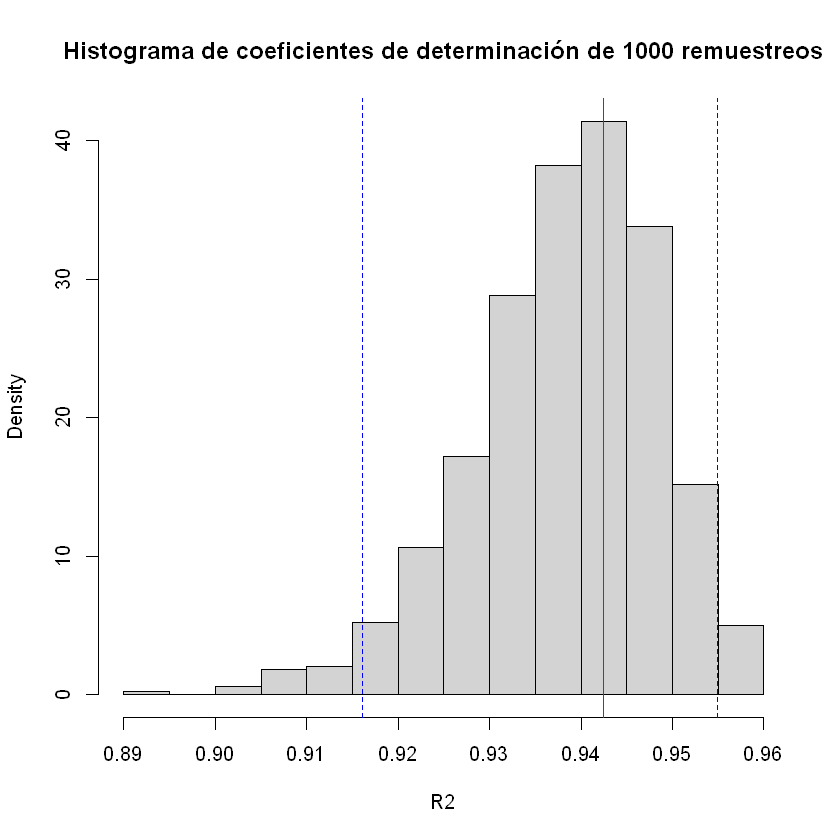

In [43]:
# Intervalos de confianza del coeficiente de determinación
cat("Intervalo de confianza del coeficiente de determinación con un nivel de 
confianza del 95%: \n")
alpha = 1 - 0.95
quantile(R2, c(alpha/2, 1-alpha/2))

# Estudia cómo se comporta el coeficiente de determinación --> hist(coef_det)
hist(R2, freq = FALSE, main="Histograma de coeficientes de determinación de 1000 remuestreos")
abline(v=summary(mrl)$r.squared, lty=1, col="red")
abline(v=quantile(R2, c(alpha/2, 1-alpha/2)), lty=2, col="blue")


cat("Coeficiente de determinación del modelo de regresión lineal:", summary(mrl)$r.squared, "\n\n")

cat("Con un 95% de confianza, se estima que el coeficiente de 
determinación se encuentra entre el 0.91 y el 0.95. Recordemos 
que en el resultado del punto anterior, el coeficiente de
determinación del modelo de regresión lineal ajustado fue de 
aproximadamente", summary(mrl)$r.squared, ", compronbandose que
el intervalo de confianza contiene este valor. Esto
sugiere que el remuestreo de los datos produce coeficientes
de determinación que están cerca del valor del coeficiente
de determinación del modelo de regresión lineal ajustado.
Por lo tanto, se puede concluir que el remuestreo de los datos
es consistente con el modelo de regresión lineal ajustado. ")

cat("Por su parte, en el histograma se observa que la distribución
de los coeficientes de determinación de los remuestreos tiene un
compotamiento similar a una normal, con una media
cercana al valor del coeficiente de determinación del modelo de
regresión lineal ajustado. ")




6. Calcula tambien mediante bootstrap los intervalos de confianza para los coeficientes del modelo.

In [39]:
# Funcion para calcular los coeficientes de cada uno de los remuestreos bootstrap
coeficientes = function(x, y, data){
  mrl = lm(y ~ x, data)
  return(coef(mrl))
}

# Calcula los coeficientes de la regresión lineal para 1000 remuestreos de los datos
coeficientes_boot = matrix(0, M, 2) #coeficientes de los remuestreos

set.seed(102)
for (i in 1:M){
  x_boot = bootstrap_sample(x)
  y_boot = 2*x_boot + error
  datos_boot = data.frame(x_boot, y_boot)
  coeficientes_boot[i,] = coeficientes(x_boot, y_boot, datos_boot)
}

str(coeficientes_boot)


 num [1:1000, 1:2] 3.47 4.37 4.31 4.42 4.8 ...


Intervalo de confianza del coeficiente de intercepción con un nivel de
confianza del 95%:

2.5%    97.5% 
3.378163 4.981549

Coeficiente de intercepción del modelo de regresión lineal: 3.830093 

Con un 95% de confianza, se estima que el coeficiente de intercepción
se encuentra entre 3.1 y 4.8. Esto es coherente con los resultados anteriores,
donde el valor del coeficiente de intercepción del modelo de regresión lineal
ajustado fue de aproximadamente 3.8. 

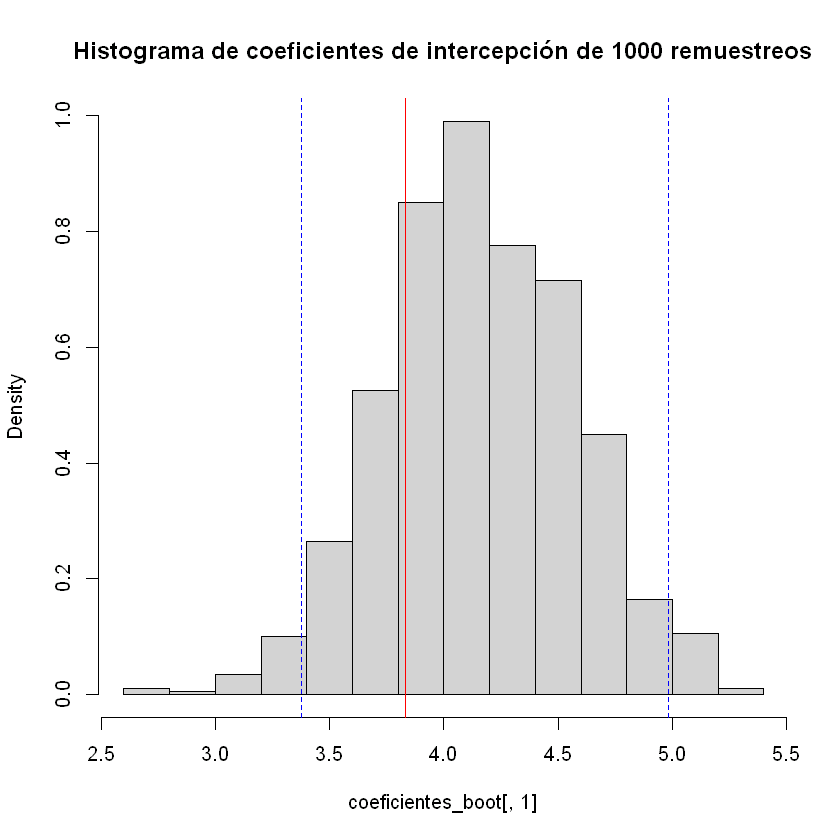

In [44]:
# Intervalos de confianza
cat("Intervalo de confianza del coeficiente de intercepción con un nivel de
confianza del 95%:")
quantile(coeficientes_boot[,1], c(alpha/2, 1-alpha/2))

# Estudia cómo se comporta el coeficiente "Intercept" --> hist(coef_Intercept)
hist(coeficientes_boot[,1], freq = FALSE, main="Histograma de coeficientes de intercepción de 1000 remuestreos")
abline(v=coef(mrl)[1], lty=1, col="red")
abline(v=quantile(coeficientes_boot[,1], c(alpha/2, 1-alpha/2)), lty=2, col="blue")

cat("Coeficiente de intercepción del modelo de regresión lineal:", coef(mrl)[1], "\n\n")

cat("Con un 95% de confianza, se estima que el coeficiente de intercepción
se encuentra entre 3.1 y 4.8. Esto es coherente con los resultados anteriores,
donde el valor del coeficiente de intercepción del modelo de regresión lineal
ajustado fue de aproximadamente 3.8. ")



Intervalo de confianza del coeficiente de pendiente con un nivel de
confianza del 95%:

2.5%    97.5% 
1.900130 2.096226

Coeficiente de pendiente del modelo de regresión lineal: 2.040577 

Con un 95% de confianza, se estima que el coeficiente de pendiente
se encuentra entre 1.9 y 2.1. Esto es coherente con los resultados anteriores,
donde el valor del coeficiente de pendiente del modelo de regresión lineal
ajustado fue de aproximadamente 2.

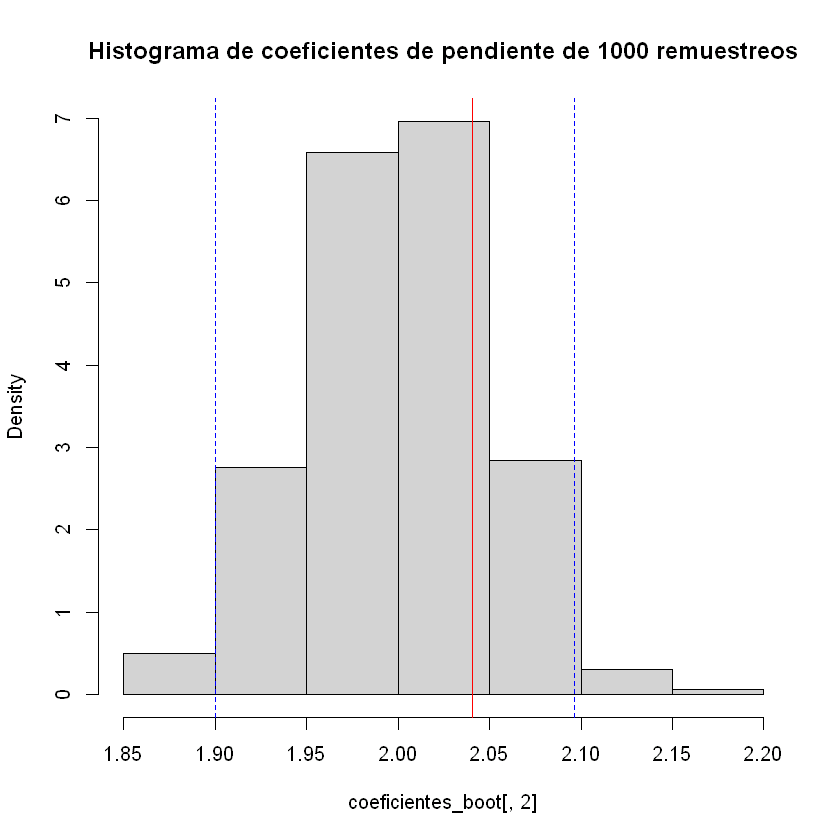

In [45]:
# Intervalos de confianza
cat("Intervalo de confianza del coeficiente de pendiente con un nivel de
confianza del 95%:")
quantile(coeficientes_boot[,2], c(alpha/2, 1-alpha/2))

# Estudia cómo se comporta el coeficiente "Slope" --> hist(coef_Slope)
hist(coeficientes_boot[,2], freq = FALSE, main="Histograma de coeficientes de pendiente de 1000 remuestreos")
abline(v=coef(mrl)[2], lty=1, col="red")
abline(v=quantile(coeficientes_boot[,2], c(alpha/2, 1-alpha/2)), lty=2, col="blue")
cat("Coeficiente de pendiente del modelo de regresión lineal:", coef(mrl)[2], "\n\n")

cat("Con un 95% de confianza, se estima que el coeficiente de pendiente
se encuentra entre 1.9 y 2.1. Esto es coherente con los resultados anteriores,
donde el valor del coeficiente de pendiente del modelo de regresión lineal
ajustado fue de aproximadamente 2.")

notas: DEfinir como se comporta R2, la media y desviación - 

para cada x y y una grafica 

La desviación estándar de los coeficientes de determinación de los remuestreos
es de aproximadamente  0.009978631 , la cual es baja y sugiere que los datos estan
cerca a la media. 
En la gráfica se puede observar la densidad de los coeficientes de determinación
de los 1000 remuestreos. El coeficiente de determinación del modelo de regresión
lineal ajustado es de aproximadamente  0.9424925 , representado 
por la línea roja, mientras que la media de los coeficientes de determinación de
los remuestreos es de aproximadamente  0.9395692 , representado por la
línea verde, por lo cual se evidencia que es muy cercano al valor real. Además,
se observa que esta dentro del intervalo de confianza del 95% (lineas azules).

Esto sugiere que el remuestreo de los datos produce coeficientes de determinación
que están cerca del valor del coeficiente de determinación del modelo de regresión
lineal ajustado. Por lo tanto, se puede concluir que el remuestreo de los datos
es consistente con el modelo de reg

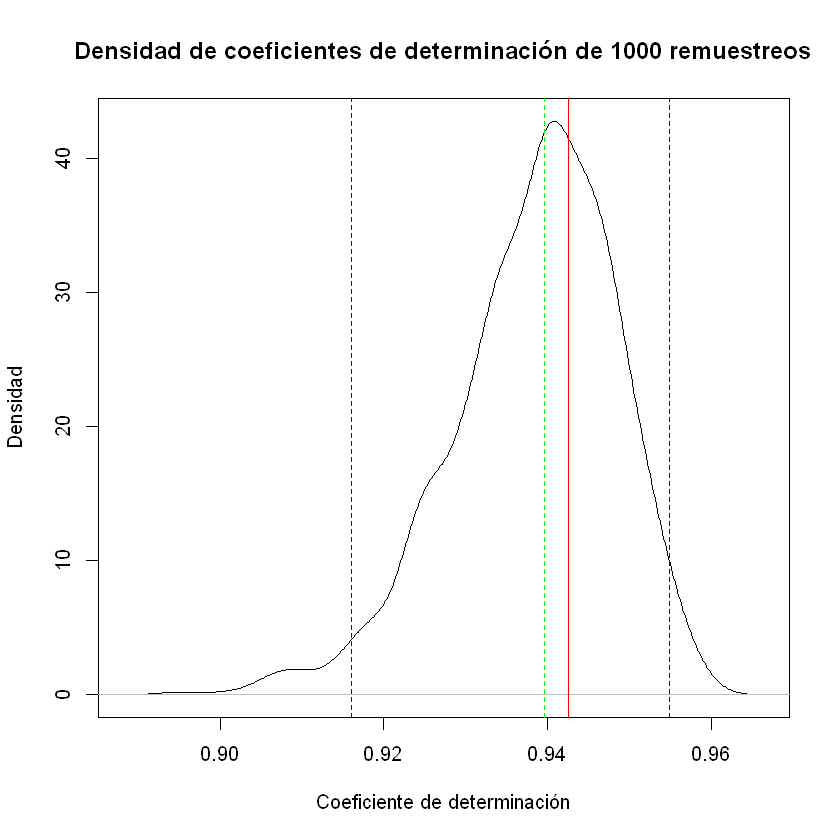

In [51]:
# como se comporta R2
densidad = density(R2)
desv = sd(R2)

#grafica
plot(densidad, main="Densidad de coeficientes de determinación de 1000 remuestreos", xlab="Coeficiente de determinación", ylab="Densidad")
abline(v=summary(mrl)$r.squared, lty=1, col="red") # valor real de la pendiente
abline(v=quantile(R2, c(alpha/2, 1-alpha/2)), lty=2, col="blue")
abline(v=median(R2), lty=2, col="green") # media de los coeficientes de pendiente bootstrap

cat("La desviación estándar de los coeficientes de determinación de los remuestreos
es de aproximadamente ", desv, ", la cual es baja y sugiere que los datos estan
cerca a la media. \n")

cat("En la gráfica se puede observar la densidad de los coeficientes de determinación
de los 1000 remuestreos. El coeficiente de determinación del modelo de regresión
lineal ajustado es de aproximadamente ", summary(mrl)$r.squared, ", representado 
por la línea roja, mientras que la media de los coeficientes de determinación de
los remuestreos es de aproximadamente ", median(R2), ", representado por la
línea verde, por lo cual se evidencia que es muy cercano al valor real. Además,
se observa que esta dentro del intervalo de confianza del 95% (lineas azules).

Esto sugiere que el remuestreo de los datos produce coeficientes de determinación
que están cerca del valor del coeficiente de determinación del modelo de regresión
lineal ajustado. Por lo tanto, se puede concluir que el remuestreo de los datos
es consistente con el modelo de regresión lineal ajustado.")
